In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import dc_stat_think as dcst
from datetime import datetime
import random
from pandas.plotting import parallel_coordinates

,src IP,dst IP,protocol,valid port,src port,dst port,pkts,bytes,flows,first packet arrival time,last packet arrival time
13,91.89.22.208,203.246.146.19,1,1,0,0,1,32,1,1491969592.362739,1491969592.362739
54,78.46.35.110,203.246.146.19,1,1,0,0,1,32,1,1491969748.238617,1491969748.238617
153,203.246.146.19,59.42.85.221,1,1,8,0,1,32,1,1491970103.180591,1491970103.180591
200,123.230.104.37,150.51.110.51,6,1,11320,7547,1,40,1,1491970340.858801,1491970340.858801
247,203.246.146.19,27.3.133.18,1,1,8,0,1,32,1,1491970537.484823,1491970537.484823
...,...,...,...,...,...,...,...,...,...,...,...
99625,203.246.146.19,24.34.53.137,1,1,8,0,1,32,1,1491972440.756829,1491972440.756829
99642,203.246.146.19,121.240.237.79,1,1,8,0,1,32,1,1491972464.524817,1491972464.524817
99785,203.246.146.19,124.196.139.36,1,1,8,0,1,32,1,1491973048.509564,1491973048.509564
99812,203.246.146.19,84.221.102.97,1,1,8,0,1,32,1,1491969573.019731,1491969573.019731


<AxesSubplot:>

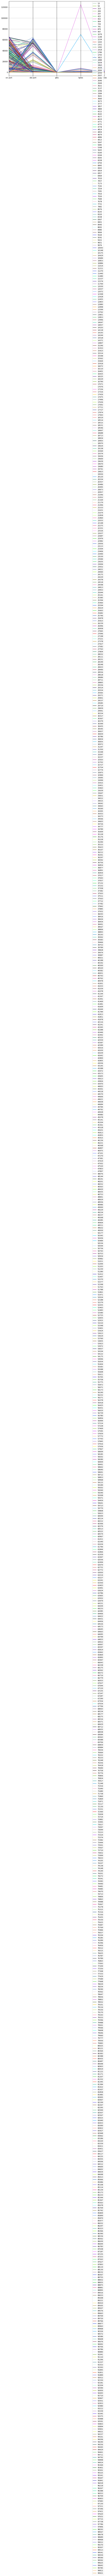

In [4]:
col_names = ['src IP', 'dst IP', 'protocol', 'valid port', 'src port', 
    'dst port', 'pkts', 'bytes', 'flows', 'first packet arrival time', 'last packet arrival time']
df = pd.read_csv('flowdata.txt', sep="\t", header=None, names=col_names)
df['first packet arrival time'] = df['first packet arrival time'].astype('str')
df['last packet arrival time'] = df['last packet arrival time'].astype('str')

# select 100 randomly
sample_i = sorted(random.sample(list(range(0,100000)), 1000))
sample_df =  df.iloc[sample_i,:]
display(sample_df)
# sample_df.index.name = 'Index label'
# print(sample_df.columns)
# sample_df['label'] = sample_df.index
sample_df = sample_df.reset_index()
sample_df['index'] = sample_df['index'].astype(str)

plt.figure(figsize=(10,8))
parallel_coordinates(sample_df.loc[:,['index','src port', 'dst port', 'pkts', 'bytes', 'flows']],'index')




,src IP,dst IP,protocol,valid port,src port,dst port,pkts,bytes,flows,first packet arrival time,last packet arrival time
57460,64.118.183.118,163.35.157.73,6,1,80,50167,200,277818,1,1491970875.77804,1491970882.622618
79062,88.112.5.242,163.35.99.62,6,1,80,50459,3,132,1,1491970134.307872,1491970134.602124
99408,104.251.235.118,133.234.175.57,6,1,80,48712,1,44,1,1491971605.831473,1491971605.831473
72267,133.235.69.41,202.140.204.54,6,1,80,53227,5,542,1,1491969792.55449,1491969792.560542
19212,203.246.133.188,218.228.45.188,6,1,80,46598,5,1042,1,1491970945.940479,1491970946.092318
...,...,...,...,...,...,...,...,...,...,...,...
35536,158.203.96.64,202.5.22.2,6,1,80,28207,19,21330,1,1491970971.808614,1491970972.06522
42890,221.120.116.96,133.60.141.160,6,1,80,22315,1,44,1,1491969726.319727,1491969726.319727
21867,203.246.133.241,60.241.116.67,6,1,80,64580,2,112,1,1491969938.132694,1491969938.226267
48595,17.114.187.207,202.140.204.237,6,1,80,49675,5,964,1,1491969776.664227,1491969776.676261


<AxesSubplot:>

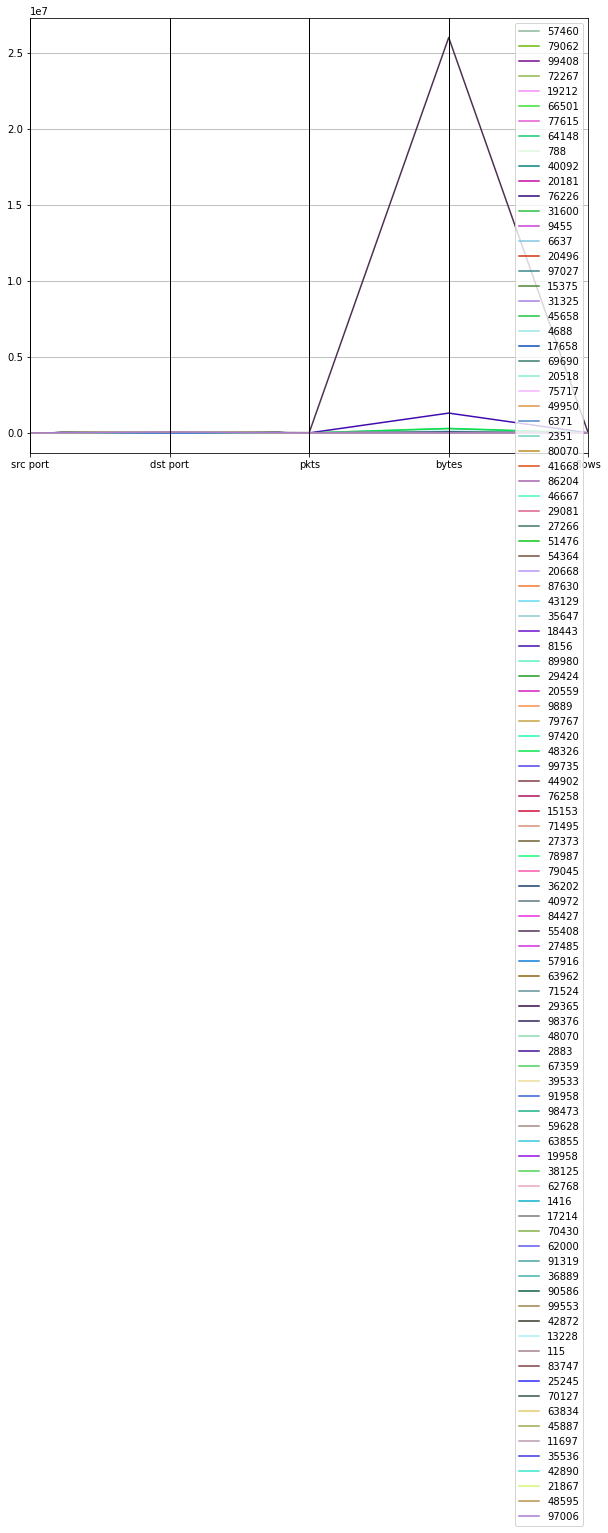

In [5]:
# flows, source port 80(WWW)
df_p80 = df[df['src port'] == 80]
sample_df_p80 = df_p80.sample(n=100)
display(sample_df_p80)
sample_df_p80 = sample_df_p80.reset_index()
sample_df_p80['index'] = sample_df_p80['index'].astype(str)

plt.figure(figsize=(10,8))
parallel_coordinates(sample_df_p80.loc[:,['index','src port', 'dst port', 'pkts', 'bytes', 'flows']],'index',)

Maximum average packet size in bytes: 
1500.0


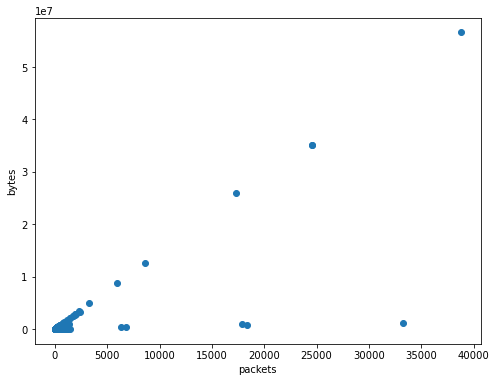

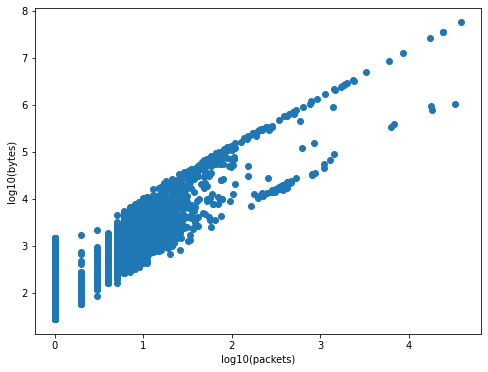

In [6]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df.loc[:,'pkts'], df.loc[:,'bytes'])
plt.xlabel('packets')
plt.ylabel('bytes')
# log scale
pkts_lin = df.loc[:,'pkts'].tolist()
bytes_lin = df.loc[:,'bytes'].tolist()
pkts_log = np.array([np.log10(x) for x in pkts_lin])
bytes_log = np.array([np.log10(x) for x in bytes_lin])
plt.figure(figsize=(8,6))
plt.scatter(pkts_log, bytes_log)
plt.xlabel('log10(packets)')
plt.ylabel('log10(bytes)')

# largest average
avg_bytes = df.loc[:,'bytes'] / df.loc[:,'pkts']
print('Maximum average packet size in bytes: ')
print(avg_bytes.max())


In [8]:
# average throughput
col_names = ['src IP', 'dst IP', 'protocol', 'valid port', 'src port', 
    'dst port', 'pkts', 'bytes', 'flows', 'first packet arrival time', 'last packet arrival time']
df = pd.read_csv('flowdata.txt', sep="\t", header=None, names=col_names)
br_l = []
interval_l = []
for index, row in df.iterrows():
    
    first_tstamp = row['first packet arrival time']
    last_tstamp = row['last packet arrival time']
    # first = datetime.fromtimestamp(first_tstamp)
    # last = datetime.fromtimestamp(last_tstamp)
    # if index == 6:
    #     print(first)
    #     print(last)
    interval_l.append(last_tstamp-first_tstamp)
    if last_tstamp-first_tstamp == 0:
        # br = row['bytes']*8/0.000001
        br_l.append('NaN')
    else:
        br = row['bytes']*8/(last_tstamp-first_tstamp)
        br_l.append(br)
df['interval']=interval_l
df['bitrate/bps']=br_l

df['first packet arrival time'] = df['first packet arrival time'].astype('str')
df['last packet arrival time'] = df['last packet arrival time'].astype('str')
a=df['first packet arrival time'] != df['last packet arrival time']
display(df)


,src IP,dst IP,protocol,valid port,src port,dst port,pkts,bytes,flows,first packet arrival time,last packet arrival time,interval,bitrate/bps
0,216.239.82.13,163.35.104.114,17,1,53,52339,1,93,1,1491969541.80174,1491969541.80174,0.0,NaN
1,203.246.146.19,106.22.48.22,1,1,8,0,1,32,1,1491969542.588011,1491969542.588011,0.0,NaN
2,203.246.146.19,218.201.19.92,1,1,8,0,1,32,1,1491969545.793305,1491969545.793305,0.0,NaN
3,176.52.159.166,203.246.146.19,1,1,0,0,1,32,1,1491969545.843147,1491969545.843147,0.0,NaN
4,203.246.146.19,5.57.5.49,1,1,8,0,1,32,1,1491969545.864678,1491969545.864678,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,111.128.229.166,203.246.146.19,1,1,0,0,1,32,1,1491970333.523843,1491970333.523843,0.0,NaN
99996,203.246.146.19,217.118.184.51,1,1,8,0,1,32,1,1491970337.968187,1491970337.968187,0.0,NaN
99997,203.246.146.19,36.106.165.25,1,1,8,0,1,32,1,1491970338.986707,1491970338.986707,0.0,NaN
99998,203.246.146.19,223.69.6.56,1,1,8,0,1,32,1,1491970345.643155,1491970345.643155,0.0,NaN
